In [49]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv('dataset_csv.csv',sep=',')
df.head()

DATE    ISE_TL   ISE_USD        SP       DAX      FTSE    NIKKEI  \
0  5-janv.-09  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
1  6-janv.-09  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2  7-janv.-09 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3  8-janv.-09 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4  9-janv.-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802

In [50]:
df.describe()

ISE_TL     ISE_USD          SP         DAX        FTSE      NIKKEI  \
count  536.000000  536.000000  536.000000  536.000000  536.000000  536.000000   
mean     0.001629    0.001552    0.000643    0.000721    0.000510    0.000308   
std      0.016264    0.021122    0.014093    0.014557    0.012656    0.014850   
min     -0.062208   -0.084716   -0.054262   -0.052331   -0.054816   -0.050448   
25%     -0.006669   -0.009753   -0.004675   -0.006212   -0.005808   -0.007407   
50%      0.002189    0.002643    0.000876    0.000887    0.000409    0.000000   
75%      0.010584    0.013809    0.006706    0.008224    0.007428    0.007882   
max      0.068952    0.100621    0.068366    0.058951    0.050323    0.061229   

          BOVESPA          EU          EM  
count  536.000000  536.000000  536.000000  
mean     0.000935    0.000471    0.000936  
std      0.015751    0.012990    0.010501  
min     -0.053849   -0.048817   -0.038564  
25%     -0.007215   -0.005952   -0.004911  
50%      0.000279    0.000196    0.001077  
75%      0.008881    0.007792    0.006423  
max      0.063792    0.067042    0.047805

In [51]:
print("Number of rows in df :", len(df))
print("Number of missing values rows in df :", pd.isnull(df).sum().sum())

Number of rows in df : 536
Number of missing values rows in df : 0


In [52]:
new_df = df.drop(['DATE'], axis=1)
new_df = new_df[(np.abs(stats.zscore(new_df)) < 3).all(axis=1)]
print("Number of rows after deletion of extremes values in df :", len(new_df))
new_df.head(536)

Number of rows after deletion of extremes values in df : 507


ISE_TL   ISE_USD        SP       DAX      FTSE    NIKKEI   BOVESPA  \
0    0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000  0.031190   
1    0.025426  0.031813  0.007787  0.008455  0.012866  0.004162  0.018920   
2   -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293 -0.035899   
4    0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474 -0.009764   
6    0.015445 -0.000272  0.001757 -0.017674 -0.006141  0.000000  0.003572   
..        ...       ...       ...       ...       ...       ...       ...   
531  0.008599  0.013400  0.006238  0.001925  0.007952  0.005717  0.018371   
532  0.009310  0.015977  0.003071 -0.001186  0.000345  0.002620  0.001686   
533  0.000191 -0.001653  0.001923  0.002872 -0.000723  0.000568  0.005628   
534 -0.013069 -0.013706 -0.020742 -0.014239 -0.011275  0.001358 -0.011942   
535 -0.007246 -0.019442  0.000000 -0.000473 -0.002997 -0.017920 -0.012252   

           EU        EM  
0    0.012698  0.028524  
1    0.011341  0.008773  
2   -0.017073 -0.020015  
4   -0.010989 -0.007802  
6   -0.012220 -0.004827  
..        ...       ...  
531  0.006975  0.003039  
532 -0.000581  0.001039  
533  0.000572  0.006938  
534 -0.012615 -0.000958  
535 -0.005465 -0.014297  

[507 rows x 9 columns]

In [53]:
new_df.describe()
new_df.to_csv("without_extremes_values.csv", sep=',', encoding='utf-8')

In [54]:
df['target'] = 0
df.loc[df.ISE_TL > 0, 'target'] = 1
df.head(536)

DATE    ISE_TL   ISE_USD        SP       DAX      FTSE    NIKKEI  \
0     5-janv.-09  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
1     6-janv.-09  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2     7-janv.-09 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3     8-janv.-09 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4     9-janv.-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   
..           ...       ...       ...       ...       ...       ...       ...   
531  16-févr.-11  0.008599  0.013400  0.006238  0.001925  0.007952  0.005717   
532  17-févr.-11  0.009310  0.015977  0.003071 -0.001186  0.000345  0.002620   
533  18-févr.-11  0.000191 -0.001653  0.001923  0.002872 -0.000723  0.000568   
534  21-févr.-11 -0.013069 -0.013706 -0.020742 -0.014239 -0.011275  0.001358   
535  22-févr.-11 -0.007246 -0.019442  0.000000 -0.000473 -0.002997 -0.017920   

      BOVESPA        EU        EM  target  
0    0.031190  0.012698  0.028524       1  
1    0.018920  0.011341  0.008773       1  
2   -0.035899 -0.017073 -0.020015       0  
3    0.028283 -0.005561 -0.019424       0  
4   -0.009764 -0.010989 -0.007802       1  
..        ...       ...       ...     ...  
531  0.018371  0.006975  0.003039       1  
532  0.001686 -0.000581  0.001039       1  
533  0.005628  0.000572  0.006938       1  
534 -0.011942 -0.012615 -0.000958       0  
535 -0.012252 -0.005465 -0.014297       0  

[536 rows x 11 columns]

In [55]:
df.to_csv("dataset_target_csv.csv", sep=',', encoding='utf-8')

In [56]:
df.describe()

ISE_TL     ISE_USD          SP         DAX        FTSE      NIKKEI  \
count  536.000000  536.000000  536.000000  536.000000  536.000000  536.000000   
mean     0.001629    0.001552    0.000643    0.000721    0.000510    0.000308   
std      0.016264    0.021122    0.014093    0.014557    0.012656    0.014850   
min     -0.062208   -0.084716   -0.054262   -0.052331   -0.054816   -0.050448   
25%     -0.006669   -0.009753   -0.004675   -0.006212   -0.005808   -0.007407   
50%      0.002189    0.002643    0.000876    0.000887    0.000409    0.000000   
75%      0.010584    0.013809    0.006706    0.008224    0.007428    0.007882   
max      0.068952    0.100621    0.068366    0.058951    0.050323    0.061229   

          BOVESPA          EU          EM      target  
count  536.000000  536.000000  536.000000  536.000000  
mean     0.000935    0.000471    0.000936    0.570896  
std      0.015751    0.012990    0.010501    0.495411  
min     -0.053849   -0.048817   -0.038564    0.000000  
25%     -0.007215   -0.005952   -0.004911    0.000000  
50%      0.000279    0.000196    0.001077    1.000000  
75%      0.008881    0.007792    0.006423    1.000000  
max      0.063792    0.067042    0.047805    1.000000

Feature  Linear Regression
0  ISE_USD           0.726048
1       SP           0.507202
2      DAX           0.672687
3     FTSE           0.800573
4   NIKKEI           0.284816
5  BOVESPA           0.447018
6       EU           0.820748
7       EM           0.929742

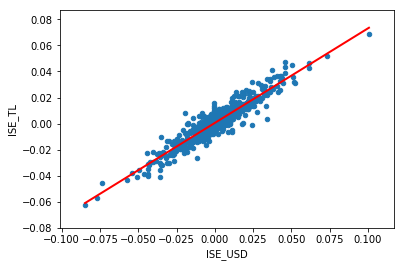

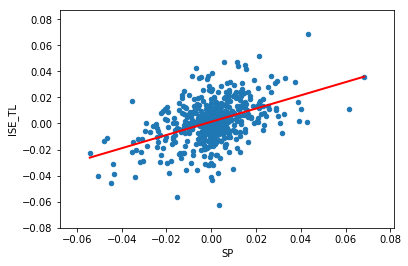

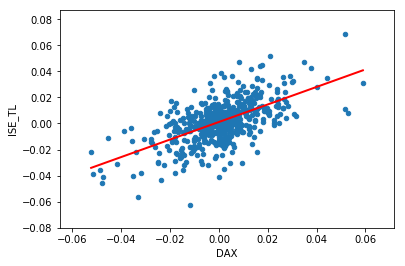

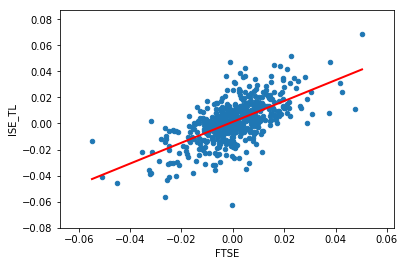

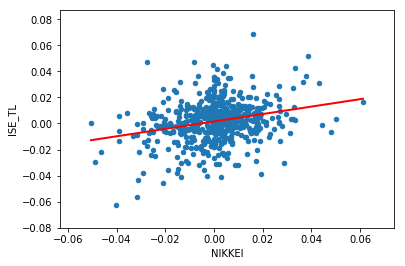

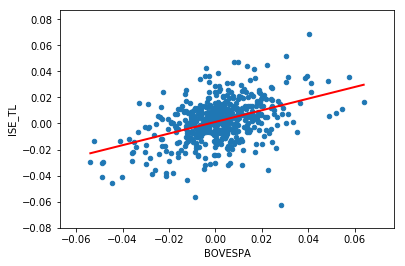

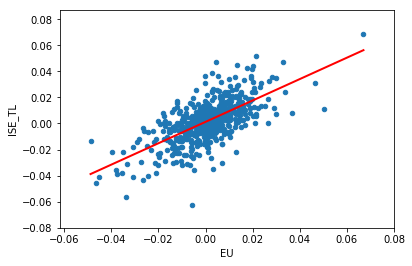

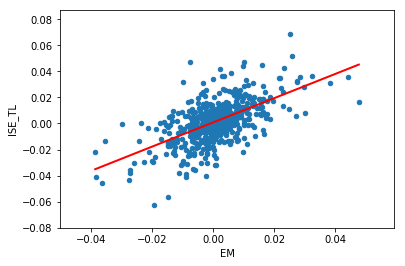

In [86]:
from sklearn.linear_model import LinearRegression

def linear_regression(df, input_var, target):
    dataframe = pd.DataFrame(columns = ['Feature', 'Linear Regression'])
    for column in df:
        if column != target and column != input_var and column != "DATE":
            X = df[[column]]
            y = df[input_var]
            lm = LinearRegression()
            lm.fit(X, y)
            X_minmax = pd.DataFrame({column: [df[column].min(), df[column].max()]})
            sales_minmax = lm.predict(X_minmax)
            df.plot(kind='scatter', x=column, y='ISE_TL')
            plt.plot(X_minmax, sales_minmax, color='r', linewidth=2)
            dataframe.loc[len(dataframe)]=[column, lm.coef_[0]]
    return dataframe

linear_regression(df, 'ISE_TL', 'target')

In [69]:
df = df.drop(['DATE'], axis=1)

In [70]:
#calcul IV categorie calculs the IV of a column of a dataframe depending on a target column
#categorie = a column of a dataframe
#target = a column of a dataframe
def calcul_IV_categorie(categorie,target):
    #Calculate relative distribution of the categories for each value of the target (%)
    IV = pd.crosstab(categorie,target).apply(lambda c: c/c.sum(), axis=0)
    #replace zero in code by a low value that doesn't affect a lot on the result(to low value affect result)
    IV[1]=IV[1].replace(0,(1/1000000))
    IV[0]=IV[0].replace(0,(1/1000000))
    #Calculate WoE for each category of your variable
    IV['WoE'] = np.log(IV[1]/IV[0])
    #Calculate IV for your variable
    IV['IV'] = (IV[1]-IV[0]) * np.log(IV[1]/IV[0])
    IV=IV['IV'].sum()
    return IV

#calcul IV categorie calculs the IV of a list of column from a dataframe, or for all the columns from df (if categories empty), depending on a target column and sorted descending  
#df= a dataframe
#categories = a list with the name of the column we want to handle
#target = a column of a dataframe
def calcul_IV_categories(df,categories,target):
    dataframe=pd.DataFrame()
    data=[]
    #check if we have given categories
    if not categories:
        # if we don't have we will take all of them execpt the target one
        categories=df
        categories=categories.drop(target,axis=1)
        categories=list(categories.columns)
    #then for each column we will calcul its IV and add it to the data list with the name off the column used
    for column in categories:
        dataframe[column] = pd.qcut(df[column],4)
        data.append([column,calcul_IV_categorie(dataframe[column],df[target])])
    #we create a dataframe with the data list that represent the IV for the given categories
    df = pd.DataFrame(data, columns = ['Feature', 'IV'])
    #we create a new column that class the IV by range with a predictor 
    conditions = [
    (df['IV'] <0.02 ),
    (df['IV'] >=0.02) & (df['IV'] < 0.2),
    (df['IV'] >=0.2) & (df['IV'] < 0.6),    
    (df['IV'] >= 0.6)]
    choices = ['Insignifiant predictor', 'Weak predictor', 'Potentially good predictor','Good predictor']
    df['Predictivity'] = np.select(conditions, choices)
    df.set_index('Feature',inplace=True)
    #we return the new dataframe sort descending
    return df.sort_values("IV",ascending=False)

IV=calcul_IV_categories(df,[],'target')
IV

IV                Predictivity
Feature                                       
ISE_TL   19.466353              Good predictor
ISE_USD   4.315845              Good predictor
EU        1.199464              Good predictor
FTSE      1.036154              Good predictor
EM        0.956238              Good predictor
DAX       0.850536              Good predictor
SP        0.434216  Potentially good predictor
BOVESPA   0.391093  Potentially good predictor
NIKKEI    0.185747              Weak predictor

In [71]:
IV.to_csv("information_values.csv", sep=',', encoding='utf-8')


In [72]:
#create_categories return a dataframe with all columns except the target one as
#categories equally proportionned, numbre define the number of categories returned
#df = a dataframe
#target = a column of a dataframe (in string)
#number = the number of catgerories wanted
def create_categories(df,target,number):
    dataframe=pd.DataFrame()
    for columns in df:
        if columns != target:
            dataframe[columns] = pd.qcut(df[columns],number)
        if columns == target:
            dataframe[target]= df[target]
    return dataframe
d=create_categories(df,'target', 4)

In [73]:
#categorie_to_numerical return a dataframe with all categorical values as numerical
#df = a dataframe
def categorie_to_numerical(df):
    dataframe=pd.DataFrame()
    cat_columns = df.select_dtypes(['category']).columns
    for column in df:
        if column in cat_columns:
            dataframe[column] = pd.Categorical(df[column]).codes
        else:
            dataframe[column]=df[column]
    return dataframe
d=categorie_to_numerical(d)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
def prediction(df,target,column):
    X = df[[column]].values
    y = df[target].values
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
    stocktree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
    stocktree.fit(X_trainset,y_trainset)
    predTree = stocktree.predict(X_testset)
    return(metrics.accuracy_score(y_testset, predTree))
print(prediction(df,'target','EU'))

0.7018633540372671


In [75]:
def all_prediction(df,target):
    dataframe=pd.DataFrame(columns = ['Feature', 'prediction'])
    for column in df:
        if column != target:
            dataframe.loc[len(dataframe)]=[column,prediction(df,target,column)]
    return dataframe
all_prediction(df,'target')


Feature  prediction
0   ISE_TL    1.000000
1  ISE_USD    0.869565
2       SP    0.614907
3      DAX    0.639752
4     FTSE    0.695652
5   NIKKEI    0.621118
6  BOVESPA    0.596273
7       EU    0.701863
8       EM    0.639752

In [77]:
X = df[['ISE_USD','SP','DAX','FTSE','NIKKEI','BOVESPA','EU','EM']].values
print(X[:5])

y = df["target"].values
print(y[:5])

[[ 0.03837619 -0.00467931  0.00219342  0.00389438  0.          0.03119023
   0.01269804  0.02852446]
 [ 0.03181274  0.00778674  0.00845534  0.01286561  0.00416245  0.01891958
   0.01134065  0.00877264]
 [-0.02635297 -0.03046913 -0.01783306 -0.02873459  0.01729293 -0.03589858
  -0.0170728  -0.02001541]
 [-0.0847159   0.00339136 -0.01172628 -0.000466   -0.04006131  0.02828315
  -0.00556096 -0.01942378]
 [ 0.00965811 -0.02153321 -0.01987275 -0.01270972 -0.0044735  -0.00976388
  -0.01098863 -0.00780221]]
[1 1 0 0 1]


In [78]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print(len(X_trainset), (len(y_trainset)))
print(len(X_testset), (len(y_testset)))

375 375
161 161


In [79]:
from sklearn.tree import DecisionTreeClassifier
stocktree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
stocktree.fit(X_trainset,y_trainset)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
predTree = stocktree.predict(X_testset)

In [81]:
print (predTree[:20])
print (y_testset[:20])

[1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1]
[1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1]


In [82]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8633540372670807


In [87]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "stock_tree.png"
featureNames = df.columns[1:9]
targetNames = ['1','0']
out=tree.export_graphviz(stocktree, 
                         feature_names=featureNames, 
                         out_file=dot_data,
                         class_names=targetNames, 
                         filled=True,
                         rounded=True,
                         special_characters=True, 
                         rotate=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

InvocationException: GraphViz's executables not found